In [3]:
from __future__ import print_function

In [4]:
%%time
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import six
%matplotlib inline

import flotilla


folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

csv_folder = '{}/csvs_for_paper'.format(folder)
outrigger_rmdup_folder = '{}/outrigger_v2_rmdup'.format(csv_folder)

metadata = pd.read_csv('{}/metadata.csv'.format(csv_folder), index_col=0)
expression = pd.read_csv('{}/expression.csv'.format(csv_folder), index_col=0)
mapping_stats = pd.read_csv('{}/mapping_stats.csv'.format(csv_folder), index_col=0)

splicing = pd.read_csv('{}/psi.csv'.format(csv_folder), index_col=0)


print('metadata.shape', metadata.shape)
print('expression.shape', expression.shape)
print('mapping_stats.shape', mapping_stats.shape)
print('splicing.shape', splicing.shape)

('metadata.shape', (214, 9))
('expression.shape', (214, 34608))
('mapping_stats.shape', (214, 35))
('splicing.shape', (251, 34982))
CPU times: user 18.7 s, sys: 120 ms, total: 18.8 s
Wall time: 18.8 s


In [5]:
psi_rmdup = pd.read_csv('{}/psi/outrigger_psi.csv'.format(outrigger_rmdup_folder))

In [9]:
skipped_exon_feature_data = pd.read_csv('{}/index/se/events.csv'.format(outrigger_folder), index_col=0)
print(skipped_exon_feature_data.shape)
skipped_exon_feature_data.head()

(403768, 45)


,event_length,event_location,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,exons,illegal_junctions,...,isoform2_tag,isoform2_transcript_id,isoform2_transcript_name,isoform2_transcript_status,isoform2_transcript_type,junction12,junction13,junction23,junctions,strand
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr12:53689424-53690237:+|isoform2=junction:chr12:53689424-53689622:+@exon:chr12:53689623-53689725:+@junction:chr12:53689726-53690237:+,970.0,event:chr12:53689366-53690335:+,exon:chr12:53689366-53689423:+,58.0,exon:chr12:53689623-53689725:+,103.0,exon:chr12:53690238-53690335:+,98.0,exon:chr12:53689366-53689423:+@exon:chr12:5368...,NaN,...,NaN,NaN,NaN,NaN,NaN,junction:chr12:53689424-53689622:+,junction:chr12:53689424-53690237:+,junction:chr12:53689726-53690237:+,junction:chr12:53689424-53689622:+@junction:ch...,+
isoform1=junction:chr1:32669647-32670198:+|isoform2=junction:chr1:32669647-32669786:+@exon:chr1:32669787-32669980:+@junction:chr1:32669981-32670198:+,1509.0,event:chr1:32669480-32670988:+,exon:chr1:32669480-32669646:+,167.0,exon:chr1:32669787-32669980:+,194.0,exon:chr1:32670199-32670988:+,790.0,exon:chr1:32669480-32669646:+@exon:chr1:326697...,NaN,...,NaN,NaN,NaN,NaN,NaN,junction:chr1:32669647-32669786:+,junction:chr1:32669647-32670198:+,junction:chr1:32669981-32670198:+,junction:chr1:32669647-32669786:+@junction:chr...,+
isoform1=junction:chrX:102931980-102940098:-|isoform2=junction:chrX:102933549-102940098:-@exon:chrX:102933427-102933548:-@junction:chrX:102931980-102933426:-,9727.0,event:chrX:102931423-102941149:-,exon:chrX:102940099-102941149:-,1051.0,exon:chrX:102933427-102933548:-,122.0,exon:chrX:102931423-102931979:-,557.0,exon:chrX:102940099-102941149:-@exon:chrX:1029...,NaN,...,NaN,NaN,NaN,NaN,NaN,junction:chrX:102933549-102940098:-,junction:chrX:102931980-102940098:-,junction:chrX:102931980-102933426:-,junction:chrX:102933549-102940098:-@junction:c...,-
isoform1=junction:chr11:118968008-118968564:-|isoform2=junction:chr11:118968262-118968564:-@exon:chr11:118968174-118968261:-@junction:chr11:118968008-118968173:-,1409.0,event:chr11:118967345-118968753:-,exon:chr11:118968565-118968753:-,189.0,exon:chr11:118968174-118968261:-,88.0,exon:chr11:118967345-118968007:-,663.0,exon:chr11:118968565-118968753:-@exon:chr11:11...,NaN,...,NaN,NaN,NaN,NaN,NaN,junction:chr11:118968262-118968564:-,junction:chr11:118968008-118968564:-,junction:chr11:118968008-118968173:-,junction:chr11:118968262-118968564:-@junction:...,-
isoform1=junction:chr10:99213421-99214470:+|isoform2=junction:chr10:99213421-99213555:+@exon:chr10:99213556-99213603:+@junction:chr10:99213604-99214470:+,1246.0,event:chr10:99213311-99214556:+,exon:chr10:99213311-99213420:+,110.0,exon:chr10:99213556-99213603:+,48.0,exon:chr10:99214471-99214556:+,86.0,exon:chr10:99213311-99213420:+@exon:chr10:9921...,NaN,...,NaN,NaN,NaN,NaN,NaN,junction:chr10:99213421-99213555:+,junction:chr10:99213421-99214470:+,junction:chr10:99213604-99214470:+,junction:chr10:99213421-99213555:+@junction:ch...,+


In [11]:
gene_name_cols = [x for x in skipped_exon_feature_data.columns if 'gene_name' in x]
gene_name_cols

['isoform1_gene_name', 'isoform2_gene_name']

In [14]:
gene_names = skipped_exon_feature_data[gene_name_cols].apply(lambda x: ','.join(set(x.dropna())), axis=1)


In [21]:
gene_names = gene_names.replace('', np.nan)
gene_names.head()

event_id
isoform1=junction:chr12:53689424-53690237:+|isoform2=junction:chr12:53689424-53689622:+@exon:chr12:53689623-53689725:+@junction:chr12:53689726-53690237:+            NaN
isoform1=junction:chr1:32669647-32670198:+|isoform2=junction:chr1:32669647-32669786:+@exon:chr1:32669787-32669980:+@junction:chr1:32669981-32670198:+                NaN
isoform1=junction:chrX:102931980-102940098:-|isoform2=junction:chrX:102933549-102940098:-@exon:chrX:102933427-102933548:-@junction:chrX:102931980-102933426:-        NaN
isoform1=junction:chr11:118968008-118968564:-|isoform2=junction:chr11:118968262-118968564:-@exon:chr11:118968174-118968261:-@junction:chr11:118968008-118968173:-    NaN
isoform1=junction:chr10:99213421-99214470:+|isoform2=junction:chr10:99213421-99213555:+@exon:chr10:99213556-99213603:+@junction:chr10:99213604-99214470:+            NaN
dtype: object

In [15]:
gene_names.tail()

event_id
isoform1=junction:chr12:121838022-121861188:+|isoform2=junction:chr12:121838022-121858044:+@exon:chr12:121858045-121858137:+@junction:chr12:121858138-121861188:+    RNF34
isoform1=junction:chr2:201750496-201753678:-|isoform2=junction:chr2:201752409-201753678:-@exon:chr2:201752336-201752408:-@junction:chr2:201750496-201752335:-        PPIL3
isoform1=junction:chr10:90332819-90342829:-|isoform2=junction:chr10:90342065-90342829:-@exon:chr10:90341959-90342064:-@junction:chr10:90332819-90341958:-             RNLS
isoform1=junction:chr15:74967484-74988220:-|isoform2=junction:chr15:74969325-74988220:-@novel_exon:chr15:74969282-74969324:-@junction:chr15:74967484-74969281:-       EDC3
isoform1=junction:chr3:141457359-141464000:+|isoform2=junction:chr3:141457359-141462350:+@exon:chr3:141462351-141462398:+@junction:chr3:141462399-141464000:+         RNF7
dtype: object

In [18]:
skipped_exon_feature_data.columns

Index([u'event_length', u'event_location', u'exon1', u'exon1_length', u'exon2',
       u'exon2_length', u'exon3', u'exon3_length', u'exons',
       u'illegal_junctions', u'intron_length', u'intron_location',
       u'isoform1_ccdsid', u'isoform1_gene_id', u'isoform1_gene_name',
       u'isoform1_gene_status', u'isoform1_gene_type', u'isoform1_havana_gene',
       u'isoform1_havana_transcript', u'isoform1_level', u'isoform1_ont',
       u'isoform1_tag', u'isoform1_transcript_id', u'isoform1_transcript_name',
       u'isoform1_transcript_status', u'isoform1_transcript_type',
       u'isoform2_ccdsid', u'isoform2_gene_id', u'isoform2_gene_name',
       u'isoform2_gene_status', u'isoform2_gene_type', u'isoform2_havana_gene',
       u'isoform2_havana_transcript', u'isoform2_level', u'isoform2_ont',
       u'isoform2_tag', u'isoform2_transcript_id', u'isoform2_transcript_name',
       u'isoform2_transcript_status', u'isoform2_transcript_type',
       u'junction12', u'junction13', u'junction2

In [19]:
gene_id_cols = [x for x in skipped_exon_feature_data.columns if 'gene_id' in x]
gene_id_cols

['isoform1_gene_id', 'isoform2_gene_id']

In [22]:
gene_ids = skipped_exon_feature_data[gene_id_cols].apply(lambda x: ','.join(set(x.dropna())), axis=1)
gene_ids.head()

event_id
isoform1=junction:chr12:53689424-53690237:+|isoform2=junction:chr12:53689424-53689622:+@exon:chr12:53689623-53689725:+@junction:chr12:53689726-53690237:+            
isoform1=junction:chr1:32669647-32670198:+|isoform2=junction:chr1:32669647-32669786:+@exon:chr1:32669787-32669980:+@junction:chr1:32669981-32670198:+                
isoform1=junction:chrX:102931980-102940098:-|isoform2=junction:chrX:102933549-102940098:-@exon:chrX:102933427-102933548:-@junction:chrX:102931980-102933426:-        
isoform1=junction:chr11:118968008-118968564:-|isoform2=junction:chr11:118968262-118968564:-@exon:chr11:118968174-118968261:-@junction:chr11:118968008-118968173:-    
isoform1=junction:chr10:99213421-99214470:+|isoform2=junction:chr10:99213421-99213555:+@exon:chr10:99213556-99213603:+@junction:chr10:99213604-99214470:+            
dtype: object

In [23]:
gene_ids.tail()

event_id
isoform1=junction:chr12:121838022-121861188:+|isoform2=junction:chr12:121838022-121858044:+@exon:chr12:121858045-121858137:+@junction:chr12:121858138-121861188:+    ENSG00000170633.12
isoform1=junction:chr2:201750496-201753678:-|isoform2=junction:chr2:201752409-201753678:-@exon:chr2:201752336-201752408:-@junction:chr2:201750496-201752335:-         ENSG00000240344.4
isoform1=junction:chr10:90332819-90342829:-|isoform2=junction:chr10:90342065-90342829:-@exon:chr10:90341959-90342064:-@junction:chr10:90332819-90341958:-             ENSG00000184719.7
isoform1=junction:chr15:74967484-74988220:-|isoform2=junction:chr15:74969325-74988220:-@novel_exon:chr15:74969282-74969324:-@junction:chr15:74967484-74969281:-       ENSG00000179151.7
isoform1=junction:chr3:141457359-141464000:+|isoform2=junction:chr3:141457359-141462350:+@exon:chr3:141462351-141462398:+@junction:chr3:141462399-141464000:+         ENSG00000114125.9
dtype: object

In [24]:
splicing.head()

,CVN_01,CVN_02,CVN_03,CVN_04,CVN_05,CVN_06,CVN_07,CVN_08,CVN_09,CVN_11,...,P8_06,P8_07,P8_09,P8_10,P8_11,P8_12,P9_01,P9_02,P9_03,P9_04
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [28]:
splicing = splicing.T
splicing.head()

event_id,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,isoform1=junction:chr10:101421386-101439481:+|isoform2=junction:chr10:101421386-101439017:+@exon:chr10:101439018-101439223:+@junction:chr10:101439224-101439481:+,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,...,isoform1=junction:chrY:21207178-21237826:-@exon:chrY:21207128-21207177:-@junction:chrY:21206582-21207127:-|isoform2=junction:chrY:21230685-21237826:-@exon:chrY:21230610-21230684:-@junction:chrY:21206582-21230609:-,isoform1=junction:chrY:21749394-21750428:+@exon:chrY:21750429-21750536:+@junction:chrY:21750537-21751406:+|isoform2=junction:chrY:21749394-21750255:+@novel_exon:chrY:21750256-21750297:+@junction:chrY:21750298-21751406:+,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21750255:+@exon:chrY:21750256-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21751406:+@exon:chrY:21751407-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21901549-21903620:-@exon:chrY:21901414-21901548:-@junction:chrY:21897637-21901413:-|isoform2=junction:chrY:21903375-21903620:-@exon:chrY:21903204-21903374:-@junction:chrY:21897637-21903203:-,isoform1=junction:chrY:2709669-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2713686:+,isoform1=junction:chrY:2710284-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2722640:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2722640:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2733128:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2733128:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2734833:+,isoform1=junction:chrY:2713785-2733128:+@exon:chrY:2733129-2733286:+@junction:chrY:2733287-2734833:+|isoform2=junction:chrY:2713785-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+
CVN_01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,0.994118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Create a flotilla study!

2016-12-29 12:44:34 	Initializing Study
2016-12-29 12:44:34 	Initializing Predictor configuration manager for Study
2016-12-29 12:44:34	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-29 12:44:34	Added ExtraTreesClassifier to default predictors
2016-12-29 12:44:34	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-29 12:44:34	Added ExtraTreesRegressor to default predictors
2016-12-29 12:44:34	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-12-29 12:44:34	Added GradientBoostingClassifier to default predictors
2016-12-29 12:44:34	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-12-29 12:44:34	Added GradientBoostingRegressor to default predictors
2016-12-29 12:44:34 	Loading metadata
2016-12-29 12:44:34	Loading species metadata from 

Error loading species hg19 data: HTTP Error 404: Not Found

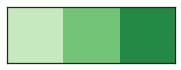

In [29]:
%matplotlib inline

greens = map(mpl.colors.rgb2hex, sns.color_palette('Greens', n_colors=3))
sns.palplot(greens)

lightgreen, mediumgreen, darkgreen = greens

phenotype_to_color = {'MN': greens[2],
                      'NPC': greens[1],
                      'iPSC': greens[0]}
phenotype_to_marker = {'MN': 's',    # square
                       'NPC': '^',   # Triangle
                       'iPSC': 'o'}  # circle
metadata_phenotype_order = ('iPSC', 'NPC', 'MN')

min_samples = 10

study = flotilla.Study(metadata, expression_data=expression, expression_log_base=2, 
                       expression_plus_one=True,
                       expression_thresh=1,
                       splicing_data=splicing,
                      
                       # At least 10 samples per feature (either gene or splicing event)
                       metadata_minimum_samples=min_samples, 
                       mapping_stats_data=mapping_stats,
                       mapping_stats_min_reads=1e6,
                       mapping_stats_number_mapped_col='Uniquely mapped reads number',
                       metadata_phenotype_order=('iPSC', 'NPC', 'MN'), 
                       metadata_phenotype_to_marker=phenotype_to_marker,
                       metadata_phenotype_to_color=phenotype_to_color,
                       species='hg19')

# Set the curated splicing feature data
# study.splicing.feature_data = splicing_feature_data

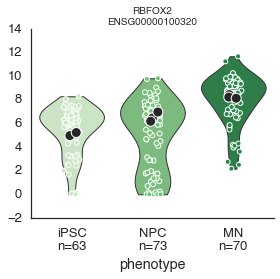

In [30]:
study.plot_gene('RBFOX2')

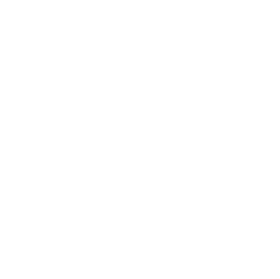

In [31]:
study.plot_event("PKM")

## Save the study!

In [32]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
